<a href="https://colab.research.google.com/github/Bjoyita/ImageProcessing/blob/main/ParticleSize_simulated_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

**LOADING AND READING IMAGE**

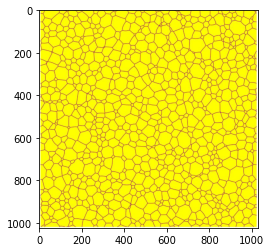

In [ ]:
im = io.imread("grains.jpg")
plt.imshow(im, cmap ='gray')

In [ ]:
im.shape

(1024, 1031, 3)

**Converting to grayscale**

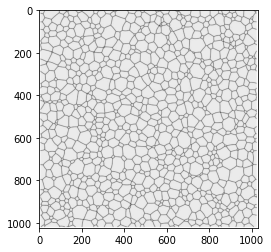

In [ ]:
from skimage.color import rgb2gray
im1 = rgb2gray(im)
plt.imshow(im1, cmap='gray')

In [ ]:
im1.shape

(1024, 1031)

**Thresholding: to get the binary image**

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<function matplotlib.pyplot.show>

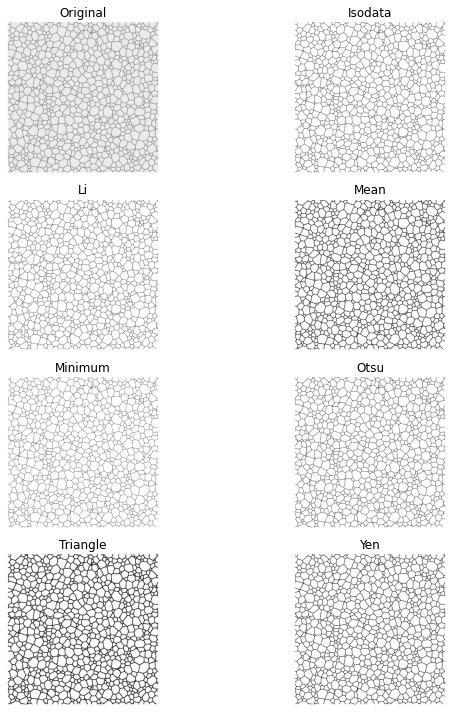

In [ ]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(im1, figsize=(10, 10), verbose=True)
plt.show

In [ ]:
from skimage.filters import threshold_mean
th = threshold_mean(im1)
print(th)

0.8579950675505411


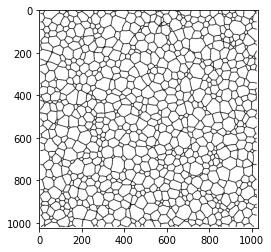

In [ ]:
th_im = im1 > th
plt.imshow(th_im, cmap='gray')

---------------------------------------------------
**PARTICLE MEASUREMNET**
---------------------------------------------------

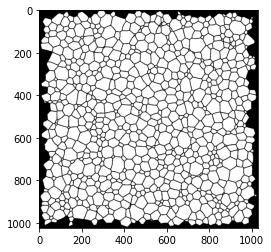

In [ ]:
from skimage.segmentation import clear_border
im2= clear_border(th_im)
plt.imshow(im2, cmap='gray')

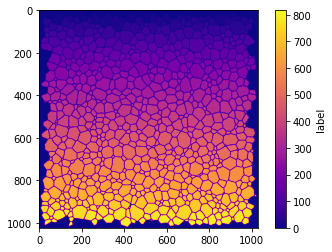

In [ ]:
from skimage.measure import label
im_l = label(im2, connectivity=im2.ndim)
#cmap=plt.cm.get_cmap('plasma')
i_map =plt.imshow(im_l, cmap='plasma')
i_map_labeled=plt.colorbar(i_map).set_label('label')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until


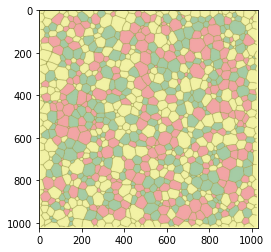

In [ ]:
from skimage.color import label2rgb
# colors option is a list of 3 elements
im_ov_s = label2rgb(im_l, image=im1, colors= ['yellow','green', 'red'])
plt.imshow(im_ov_s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until


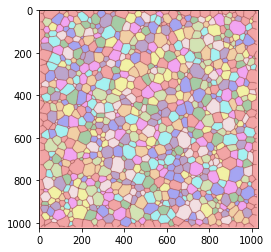

In [ ]:
from skimage.color import label2rgb
import matplotlib as mpl
im_ov_s1 = label2rgb(im_l, image=im1)
plt.imsave("im_ov_s.jpg", im_ov_s1) 
plt.imshow(im_ov_s1)


In [ ]:
from skimage.measure import regionprops, regionprops_table
scale = 4 #nm/pixel
props=regionprops(im_l, im1)
#for prop in all_props:
#print('Label: {} Area: {}'.format(prop.label, prop.area))


props_t = regionprops_table(im_l, im1, 
                          properties=['label','area', 'equivalent_diameter',
                                       'solidity'])

import pandas as pd
df = pd.DataFrame(props_t)
print(df)


     label  area  equivalent_diameter  solidity
0        1   802            31.955252  0.947991
1        2   619            28.073747  0.942161
2        3   521            25.755733  0.937050
3        4   111            11.888212  0.925000
4        5   314            19.994930  0.945783
..     ...   ...                  ...       ...
812    813   622            28.141695  0.948171
813    814   447            23.856615  0.935146
814    815   572            26.986905  0.948590
815    816   461            24.227328  0.940816
816    817   227            17.000746  0.904382

[817 rows x 4 columns]


In [ ]:
df['area_sqnm'] = df['area'] * (scale**2)
df['equivalent_diameter_nm'] = df['equivalent_diameter'] * (scale)
df

,label,area,equivalent_diameter,solidity,area_sqnm,equivalent_diameter_nm
0,1,802,31.955252,0.947991,12832,127.821007
1,2,619,28.073747,0.942161,9904,112.294989
2,3,521,25.755733,0.937050,8336,103.022934
3,4,111,11.888212,0.925000,1776,47.552849
4,5,314,19.994930,0.945783,5024,79.979719
...,...,...,...,...,...,...
812,813,622,28.141695,0.948171,9952,112.566780
813,814,447,23.856615,0.935146,7152,95.426460
814,815,572,26.986905,0.948590,9152,107.947618
815,816,461,24.227328,0.940816,7376,96.909313


In [ ]:
df = df[df['area'] > 100]


**Equivalent diameter = SqRoot{(4*Area)/pi}**

In [ ]:
df

,label,area,equivalent_diameter,solidity,area_sqnm,equivalent_diameter_nm
0,1,802,31.955252,0.947991,12832,127.821007
1,2,619,28.073747,0.942161,9904,112.294989
2,3,521,25.755733,0.937050,8336,103.022934
3,4,111,11.888212,0.925000,1776,47.552849
4,5,314,19.994930,0.945783,5024,79.979719
...,...,...,...,...,...,...
812,813,622,28.141695,0.948171,9952,112.566780
813,814,447,23.856615,0.935146,7152,95.426460
814,815,572,26.986905,0.948590,9152,107.947618
815,816,461,24.227328,0.940816,7376,96.909313


In [ ]:
df_final = df.reindex(columns =['label', 'area_sqnm', 'equivalent_diameter_nm', 'solidity'])
df_final

,label,area_sqnm,equivalent_diameter_nm,solidity
0,1,12832,127.821007,0.947991
1,2,9904,112.294989,0.942161
2,3,8336,103.022934,0.937050
3,4,1776,47.552849,0.925000
4,5,5024,79.979719,0.945783
...,...,...,...,...
812,813,9952,112.566780,0.948171
813,814,7152,95.426460,0.935146
814,815,9152,107.947618,0.948590
815,816,7376,96.909313,0.940816


In [ ]:
df_final.to_csv('measure_simulated.csv')

In [ ]:
import plotly.express as px
fig = px.scatter(df_final, x="label", y="equivalent_diameter_nm", color="label")
                
fig.show()

**Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.**

**Density: normalize such that the total area of the histogram equals 1**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



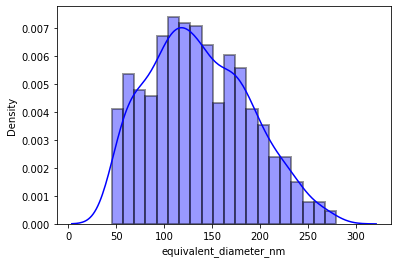

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df_final['equivalent_diameter_nm'], color='b', bins = 20, kde = True, norm_hist=True, hist_kws = dict(edgecolor = 'k', linewidth = 2))


count: show the number of observations in each bin

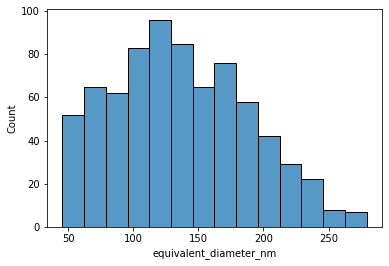

In [ ]:
sns.histplot(data=df_final['equivalent_diameter_nm'] )

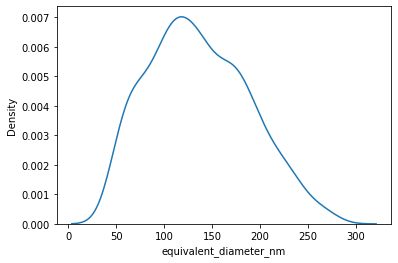

In [ ]:
sns.kdeplot(data=df_final['equivalent_diameter_nm'] )

In [ ]:
x = df_final['equivalent_diameter_nm']

In [ ]:
print(x)

0      127.821007
1      112.294989
2      103.022934
3       47.552849
4       79.979719
          ...    
812    112.566780
813     95.426460
814    107.947618
815     96.909313
816     68.002985
Name: equivalent_diameter_nm, Length: 750, dtype: float64


**PERCENTILE D10, D50, D90**

In [ ]:
np.percentile(x, 50)

132.13122506587362

In [ ]:
np.percentile(x, 90)

208.2976609683438

In [ ]:
np.percentile(x, 10)

67.80784813175154